In [1]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os,sys
sns.set()
import warnings
warnings.filterwarnings('ignore')
from numpy import log
from pandas import Series
from datetime import datetime

In [2]:
df=pd.read_csv("airline_passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month']=pd.to_datetime(df['Month'])
df

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [4]:
df.set_index('Month',inplace=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

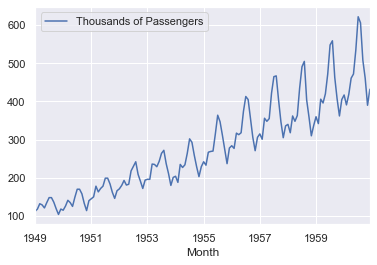

In [5]:
df.plot()

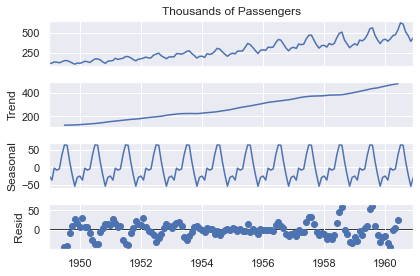

In [6]:
# decomostion required
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion=seasonal_decompose(df['Thousands of Passengers'],model='adatitive',period=12)
decompostion.plot()
plt.show()

In [7]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Thousands of Passengers'])

0.0121527966037621

In [8]:
# please make sure that your time series data would be stationary only then you have to buld TS algorithm.

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(df['Thousands of Passengers'])

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
def adf_check(timeseries):
    result=adfuller(timeseries)
    print("Augmented Dickey Fuller Test: To find data is stationary or non stationary ")
    labels=['ADF stats Test','P-values','#lags','no of obseration']
    for i,j in zip(result,labels):
        print(j +"=" + str(i))
    if result[1]<=0.05:
        
        print("Strong evidence againt null hypothesis and time series is stationary")
    else:
        print("weak evidence against null hypothesis and time series is non stationary")

In [12]:
adf_check(df['Thousands of Passengers'])

Augmented Dickey Fuller Test: To find data is stationary or non stationary 
ADF stats Test=0.8153688792060502
P-values=0.991880243437641
#lags=13
no of obseration=130
weak evidence against null hypothesis and time series is non stationary


In [13]:
df['1st Diff']=df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [14]:
df.tail(20)

,Thousands of Passengers,1st Diff
Month,,
1959-05-01,420,24.0
1959-06-01,472,52.0
1959-07-01,548,76.0
1959-08-01,559,11.0
1959-09-01,463,-96.0
1959-10-01,407,-56.0
1959-11-01,362,-45.0
1959-12-01,405,43.0
1960-01-01,417,12.0


In [15]:
adf_check(df['1st Diff'].dropna())

Augmented Dickey Fuller Test: To find data is stationary or non stationary 
ADF stats Test=-2.829266824170006
P-values=0.05421329028382468
#lags=12
no of obseration=130
weak evidence against null hypothesis and time series is non stationary


In [16]:
df['2nd Diff']=df['1st Diff'] - df['1st Diff'].shift(1)

In [17]:
df.head(20)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [18]:
adf_check(df['2nd Diff'].dropna())

Augmented Dickey Fuller Test: To find data is stationary or non stationary 
ADF stats Test=-16.384231542468527
P-values=2.732891850014085e-29
#lags=11
no of obseration=130
Strong evidence againt null hypothesis and time series is stationary


In [19]:
# trend: p d q
# d = 2
# p =
# q =

# Seasonality
# P = 
# D = 1
# Q =


In [20]:
df['Seasonality']=df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [21]:
df.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [22]:
adf_check(df['Seasonality'].dropna())

Augmented Dickey Fuller Test: To find data is stationary or non stationary 
ADF stats Test=-3.3830207264924805
P-values=0.011551493085514982
#lags=1
no of obseration=130
Strong evidence againt null hypothesis and time series is stationary


In [23]:
# trend: p d q
# d = 2
# p = 4
# q =

# Seasonality
# P = 
# D = 1
# Q =

In [24]:
pip install --upgrade statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

# Trend

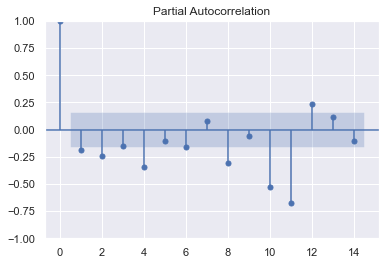

In [26]:
plot_pacf(df['2nd Diff'].dropna(),lags=14)
plt.show()

In [27]:
# trend: p d q
# d = 2
# p = 4
# q =

# Seasonality
# P = 
# D = 1
# Q =

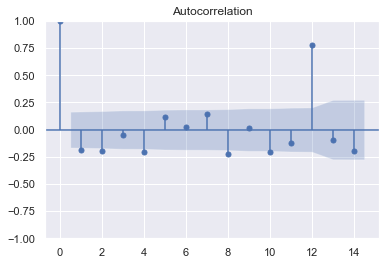

In [28]:
plot_acf(df['2nd Diff'].dropna(),lags=14)
plt.show()

In [29]:
# trend: p d q
# d = 2
# p = 4
# q = 2

# Seasonality
# P = 
# D = 1
# Q =

# Seasonality

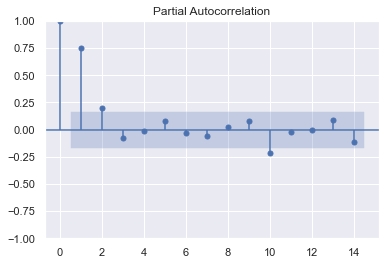

In [30]:
plot_pacf(df['Seasonality'].dropna(),lags=14)
plt.show()

In [31]:
# trend: p d q
# d = 2
# p = 4
# q = 2

# Seasonality
# P = 2
# D = 1
# Q =

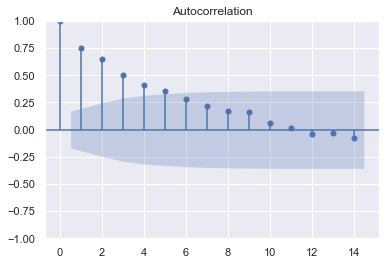

In [32]:
plot_acf(df['Seasonality'].dropna(),lags=14)
plt.show()

In [33]:
# trend: p d q
# d = 2 # Augmented dikey fuller test
# p = 4 # Partial Autocorrelation
# q = 2 # Autocorrelation

# Seasonality
# P = 2  # Partial Autocorrelation

# D = 1 # Augmented dikey fuller test
# Q = 5 # Autocorrelation

# ARIMA

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [35]:
df.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [36]:
model=sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=(4,2,2),seasonal_order=(2,1,1,12))
result=model.fit()
print(result.summary())

C:\Users\aatif\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aatif\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.782
Date:                              Tue, 19 Sep 2023   AIC                           1015.564
Time:                                      11:52:34   BIC                           1044.239
Sample:                                  01-01-1949   HQIC                          1027.216
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3591      0.097    -14.005      0.000      -1.549      -1.169
ar.L2         -0.49

In [37]:
df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0
1960-11-01,390,-71.0,-24.0,28.0
1960-12-01,432,42.0,113.0,27.0


In [38]:
len(df)

144

<AxesSubplot:xlabel='Month'>

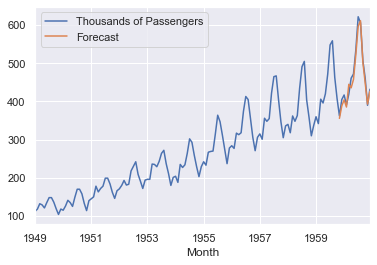

In [39]:
# validate the model by using training data set
df['Forecast']=result.predict(start=130,end=144,dynamic=True)
df[['Thousands of Passengers','Forecast']].plot()

In [40]:
df.tail(1)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1960-12-01,432,42.0,113.0,27.0,426.466369


In [41]:
from pandas.tseries.offsets import DateOffset

In [42]:
future_data=[df.index[-1] + DateOffset(months=x)for x in range(0,61)]

In [43]:
future_data

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [44]:
future_dates_df=pd.DataFrame(index=future_data[1:],columns=df.columns)

In [45]:
future_dates_df

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [46]:
future_pred=pd.concat([df,future_dates_df])

In [47]:
future_pred.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [48]:
print(len(df))
print(len(future_pred))

144
204


# Predict the future data for 60 months

C:\Users\aatif\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

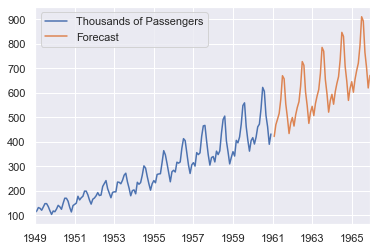

In [49]:
future_pred['Forecast']=result.predict(start=145, end=204,dynamic= True)
future_pred[['Thousands of Passengers','Forecast']].plot()

In [50]:
future_pred.tail(60)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,421.795533
1961-03-01,NaN,NaN,NaN,NaN,469.998107
1961-04-01,NaN,NaN,NaN,NaN,492.194531
1961-05-01,NaN,NaN,NaN,NaN,515.957820
1961-06-01,NaN,NaN,NaN,NaN,574.218707
1961-07-01,NaN,NaN,NaN,NaN,669.653770
1961-08-01,NaN,NaN,NaN,NaN,657.145127
1961-09-01,NaN,NaN,NaN,NaN,554.743673
1961-10-01,NaN,NaN,NaN,NaN,499.204955


In [51]:
future_pred.to_csv('Forecasting.csv')

PermissionError: [Errno 13] Permission denied: 'Forecasting.csv'

In [52]:
future_pred.to_csv('Forecasting.csv')

PermissionError: [Errno 13] Permission denied: 'Forecasting.csv'